In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from pandas import DataFrame

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

## Подготовим данные

Данные:

In [59]:
df_all_engines = pd.read_csv("/home/maksim/Desktop/Projects/engine_analysis/data/data.csv", decimal=",")
df_all_engines.rename({"№": 'Number'}, axis=1, inplace=True)
df_all_engines.head(10)

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
0,1,0.000648,-30,8,30,1543.3,9.8644,0.82,0.21679,0.39073,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15
1,2,0.000564,-30,8,30,1561.3,9.9798,0.82,0.21428,0.39530,...,0.03801,90.601,2.4128,370.14,72.063,928.49,6.8396,941.81,45,2.15
2,3,0.000479,-30,8,30,1575.7,10.0720,0.82,0.21232,0.39895,...,0.02820,89.601,2.4125,368.59,72.069,924.78,6.8709,941.93,45,2.15
3,4,0.000648,-20,8,30,1759.3,11.2460,0.92,0.21335,0.39702,...,0.05511,89.001,2.4141,368.88,72.312,927.99,7.3033,997.50,45,2.15
4,5,0.000564,-20,8,30,1771.8,11.3250,0.92,0.21185,0.39984,...,0.04087,93.201,2.4137,367.18,72.284,923.54,7.3549,1000.40,45,2.15
5,6,0.000479,-20,8,30,1786.1,11.4170,0.92,0.21015,0.40307,...,0.03086,95.201,2.3879,364.60,71.548,917.50,7.3780,1007.00,45,2.15
6,7,0.000648,-10,8,30,1967.3,12.5750,1.02,0.21153,0.40043,...,0.05491,90.601,2.3897,367.12,71.722,925.40,7.7625,1060.80,45,2.15
7,8,0.000564,-10,8,30,1978.4,12.6460,1.02,0.21036,0.40268,...,0.04044,97.201,2.3888,366.15,71.651,922.39,7.8372,1069.50,45,2.15
8,9,0.000479,-10,8,30,1983.2,12.6770,1.02,0.20984,0.40366,...,0.02980,101.600,2.3880,365.19,71.599,919.63,7.9174,1078.40,45,2.15
9,10,0.000648,-26,12,30,1551.8,9.9191,0.82,0.21559,0.39290,...,0.05537,88.201,2.2012,356.34,72.372,921.35,6.8232,928.87,30,2.15


In [60]:
df_all_engines.x4.head()

0    30
1    30
2    30
3    30
4    30
Name: x4, dtype: int64

In [61]:
df_all_engines.Number.head()

0    1
1    2
2    3
3    4
4    5
Name: Number, dtype: int64

In [62]:
df_all_engines.Ne.head()

0    1543.3
1    1561.3
2    1575.7
3    1759.3
4    1771.8
Name: Ne, dtype: float64

In [63]:
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Ne')

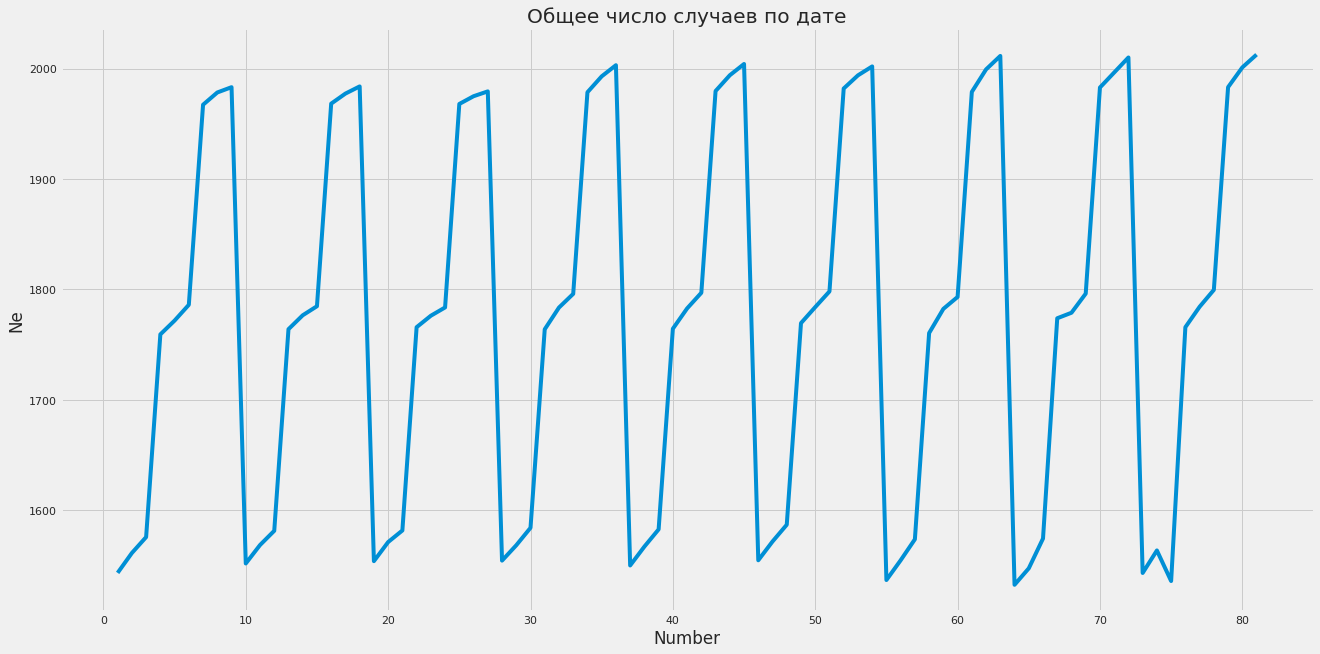

In [64]:
#df_all_engines.Number = pd.to_numeric(df_all_engines.Number, downcast="integer")
#df_all_engines.Ne = pd.to_numeric(df_all_engines.Ne, downcast="float", errors="coerce")
#df_all_engines = df_all_engines.replace(np.nan, 0, regex=True)
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Number, df_all_engines.Ne)
plt.title("Общее число случаев по дате")
plt.xlabel("Number")
plt.ylabel("Ne")

Text(0, 0.5, 'Ta')

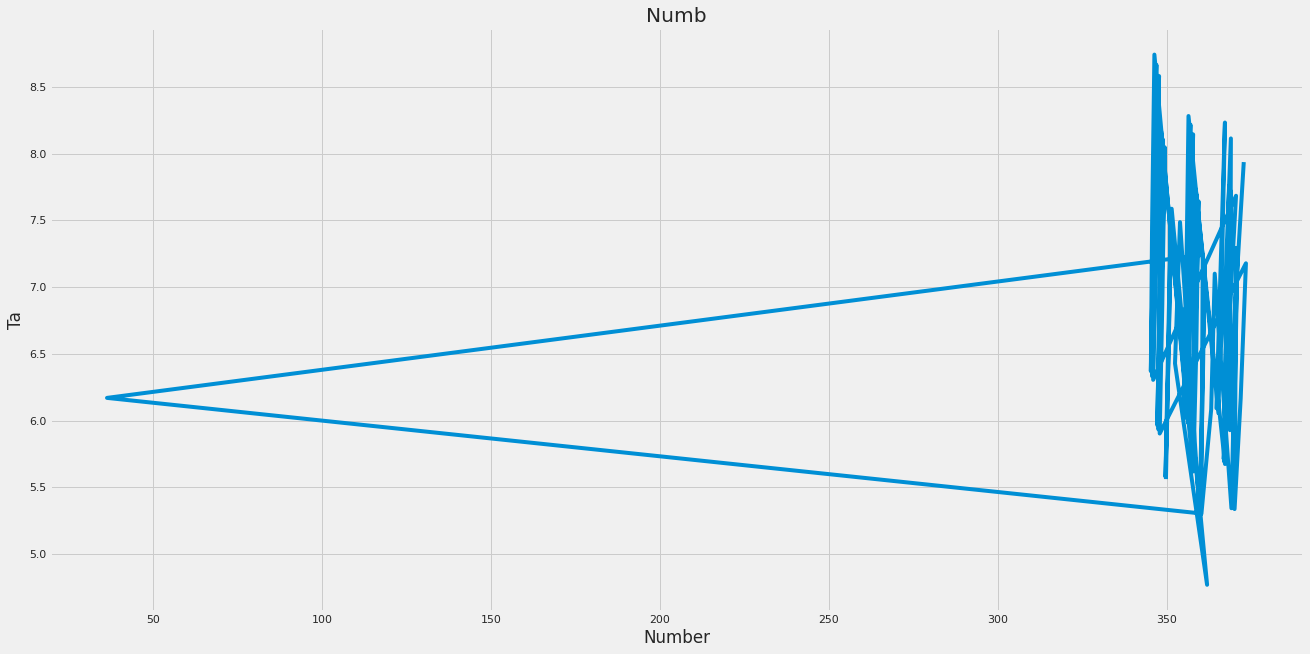

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Ta, df_all_engines["П-од зв"])
plt.title("Numb")
plt.xlabel("Number")
plt.ylabel("Ta")

In [66]:
df_all_engines["кпд е"][12] = 0.399807


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Число случаев (тысяч)')

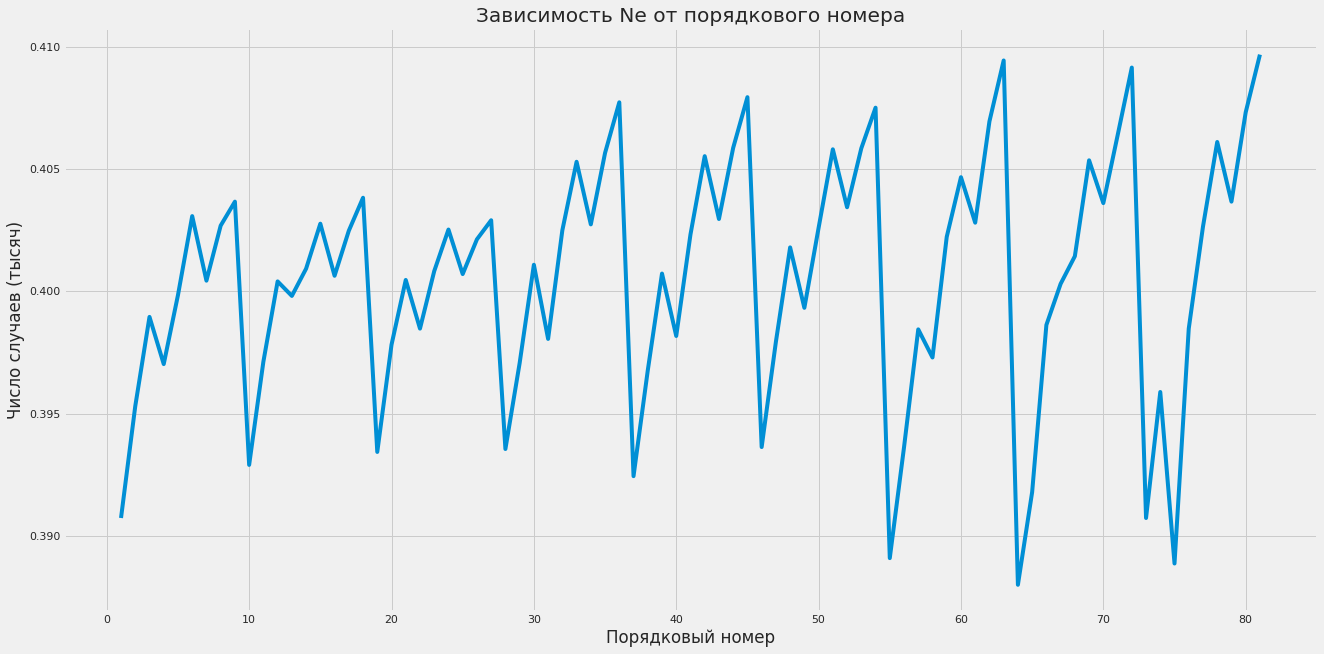

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Number, df_all_engines["кпд е"])
plt.title("Зависимость Ne от порядкового номера")
plt.xlabel("Порядковый номер")
plt.ylabel("Число случаев (тысяч)")

In [68]:
df_x2_30 = df_all_engines[df_all_engines.x2 == -30]
df_x2_26 = df_all_engines[df_all_engines.x2 == -26]
df_x2_20 = df_all_engines[df_all_engines.x2 == -20]
df_x2_16 = df_all_engines[df_all_engines.x2 == -16]
df_x2_12 = df_all_engines[df_all_engines.x2 == -12]
df_x2_10 = df_all_engines[df_all_engines.x2 == -10]
df_x2_6 = df_all_engines[df_all_engines.x2 == -6]
df_x2_2 = df_all_engines[df_all_engines.x2 == -2]
df_x2_30.tail()

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
28,29,0.000564,-30,8,15,1568.3,10.0240,0.82,0.21333,0.39706,...,0.03488,84.0,2.6611,368.09,79.561,924.29,7.1197,885.58,45,2.39
29,30,0.000479,-30,8,15,1584.1,10.1260,0.82,0.21119,0.40108,...,0.02562,83.6,2.6607,366.76,79.545,920.91,7.1476,885.73,45,2.39
54,55,0.000648,-30,8,0,1536.8,9.8229,0.82,0.21770,0.38909,...,0.04099,79.8,2.9346,373.33,87.557,935.51,7.4097,849.04,45,2.63
55,56,0.000564,-30,8,0,1554.7,9.9373,0.82,0.21520,0.39362,...,0.02983,80.4,2.9342,371.78,87.562,931.81,7.4247,847.14,45,2.63
56,57,0.000479,-30,8,0,1573.7,10.0590,0.82,0.21259,0.39844,...,0.02201,80.2,2.9338,369.97,87.564,927.42,7.4518,846.04,45,2.63


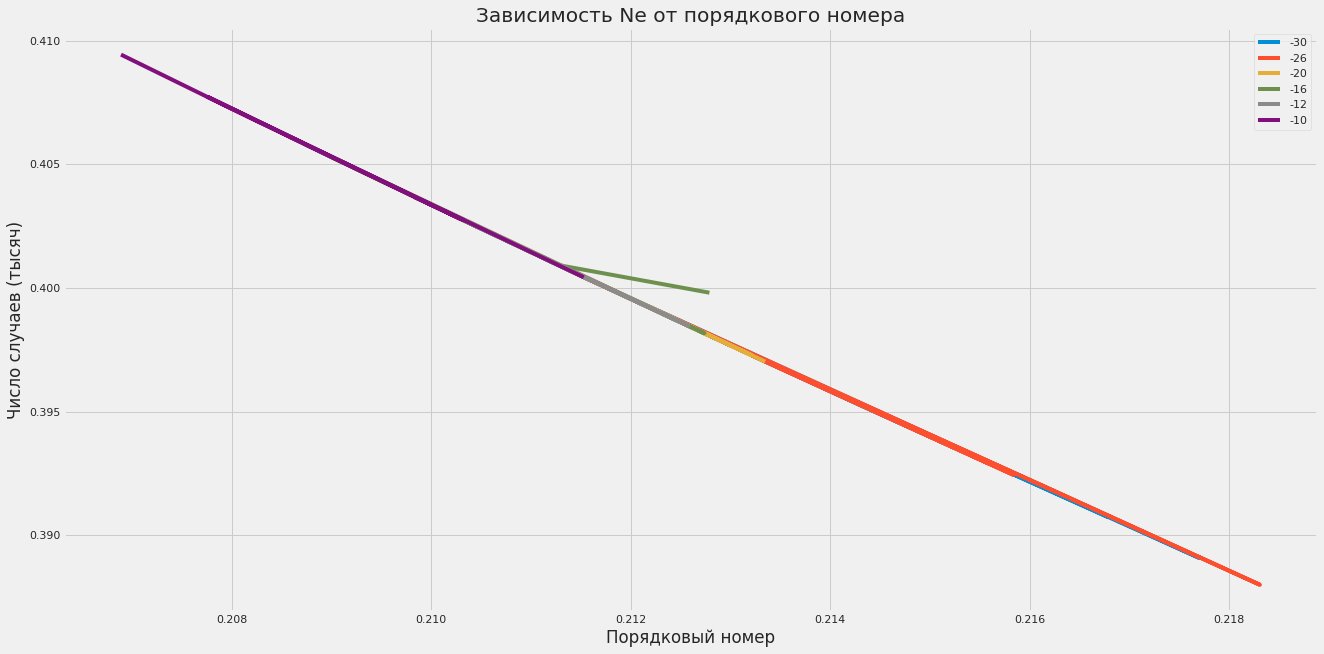

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(df_x2_30["be"], df_x2_30["кпд е"], label='-30')
plt.plot(df_x2_26["be"], df_x2_26["кпд е"], label='-26')
plt.plot(df_x2_20["be"], df_x2_20["кпд е"], label='-20')
plt.plot(df_x2_16["be"], df_x2_16["кпд е"], label='-16')
plt.plot(df_x2_12["be"], df_x2_12["кпд е"], label='-12')
plt.plot(df_x2_10["be"], df_x2_10["кпд е"], label='-10')
plt.title("Зависимость Ne от порядкового номера")
plt.xlabel("Порядковый номер")
plt.ylabel("Число случаев (тысяч)")
plt.legend()

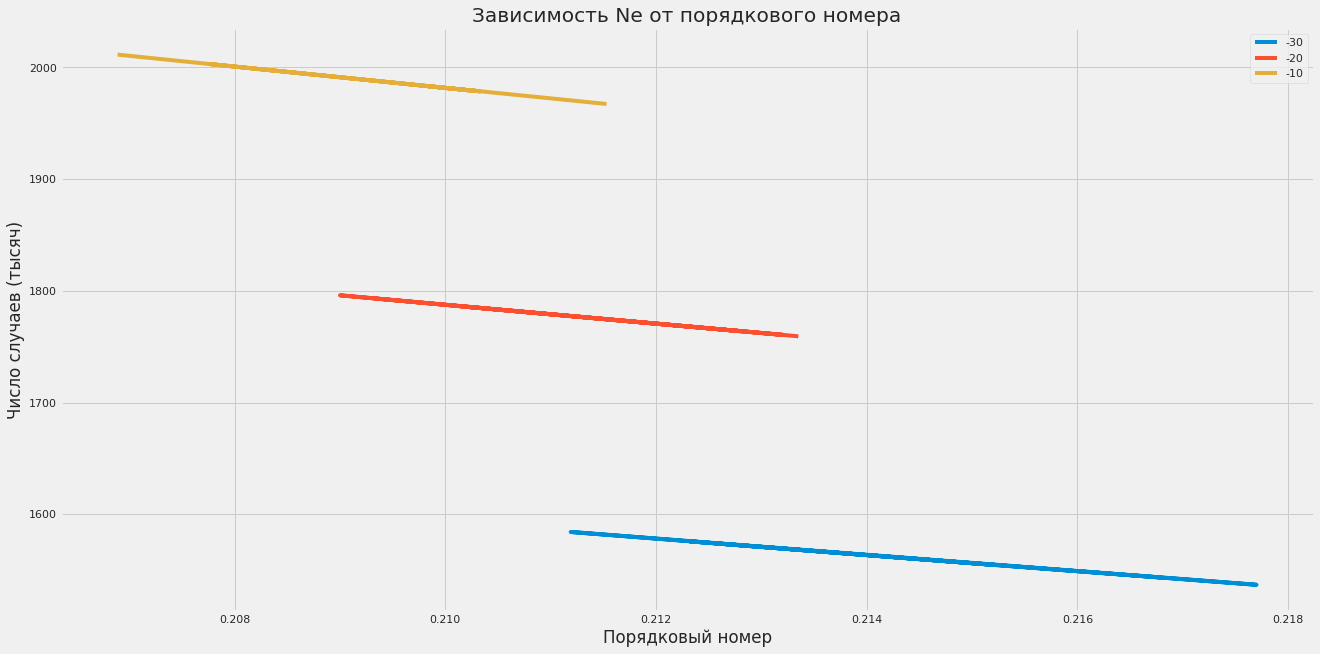

In [70]:
plt.figure(figsize=(20, 10))
plt.plot(df_x2_30["be"], df_x2_30.Ne, label='-30')
plt.plot(df_x2_20["be"], df_x2_20.Ne, label='-20')
plt.plot(df_x2_10["be"], df_x2_10.Ne, label='-10')
plt.title("Зависимость Ne от порядкового номера")
plt.xlabel("Порядковый номер")
plt.ylabel("Число случаев (тысяч)")
plt.legend()